# Исследование объявлений о продаже квартир

В распоряжении данные сервиса XXXXXXXX — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

В конце находится чек-лист готовности проекта (проект я полностью выполнил, постепенно я буду возвращаться и улучшать его).

#### Описание данных

airports_nearest — расстояние до ближайшего аэропорта в метрах (м) \
balcony — число балконов \
ceiling_height — высота потолков (м) \
cityCenters_nearest — расстояние до центра города (м) \
days_exposition — сколько дней было размещено объявление (от публикации до снятия) \
first_day_exposition — дата публикации \
floor — этаж \
floors_total — всего этажей в доме \
is_apartment — апартаменты (булев тип) \
kitchen_area — площадь кухни в квадратных метрах (м²) \
last_price — цена на момент снятия с публикации \
living_area — жилая площадь в квадратных метрах (м²) \
locality_name — название населённого пункта \
open_plan — свободная планировка (булев тип) \
parks_around3000 — число парков в радиусе 3 км \
parks_nearest — расстояние до ближайшего парка (м) \
ponds_around3000 — число водоёмов в радиусе 3 км \
ponds_nearest — расстояние до ближайшего водоёма (м) \
rooms — число комнат \
studio — квартира-студия (булев тип) \
total_area — площадь квартиры в квадратных метрах (м²) \
total_images — число фотографий квартиры в объявленииквартиры в объявлении

#### 0.0.2 Подключаем библиотеки

In [84]:
import pandas as pd

import matplotlib.pyplot as plt

## Изучение данных из файла

In [2]:
df = pd.read_csv("real_estate_data.csv", sep="\t")

### Вывод

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


## Предобработка данных

### Определение и замена пропущенных значений

In [5]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Для столбца balcony логично заменить пропущенные значения на 0, т.к. если человек не указал количество балконов, скорее всего их ноль. Так же для столбца is_apartment, если человек не указал эти данные, скорее всего это не апартаменты.

In [6]:
df["balcony"] = df["balcony"].fillna(value=0)
df["is_apartment"] = df["is_apartment"].fillna(value=False)

 Данные в большинстве столбцах могли быть не указаны, т.к. они не играют особой роли, на них редко обращают внимание потенциальные покупатели. Некоторые данные могли быть пропущены по ошибке системы/аналитика/пользователя. Для большинства остальных столбцов подходящей заменой будет медианное значение в соответственном столбце, так как оно более устойчиво (чем среднее арифм.) к выбросам и аномальным значениям в данных. Но, например, для столбца locality_name подходящей замены нет. Так же я не буду заменять пропущенные значения в некоторых столбцах, которые не будут учитываться при анализе данных (например: parks_around3000, ponds_nearest и т.д.).

In [7]:
med_centre = df["cityCenters_nearest"].median()
med_floors = df["floors_total"].median()
med_ceil = df["ceiling_height"].median()
med_live = df["living_area"].median()
med_kitchen = df["kitchen_area"].median()
med_days = df["days_exposition"].median()
df["cityCenters_nearest"] = df["cityCenters_nearest"].fillna(value=med_centre)
df["floors_total"] = df["floors_total"].fillna(value=med_floors)
df["ceiling_height"] = df["ceiling_height"].fillna(value=med_ceil)
df["living_area"] = df["living_area"].fillna(value=med_live)
df["kitchen_area"] = df["kitchen_area"].fillna(value=med_kitchen)
df["days_exposition"] = df["days_exposition"].fillna(value=med_days)

In [8]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest         0
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition             0
dtype: int64

### Изменение типов данных

In [9]:
df.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

 Для многих столбцов здесь можно изменить тип данных с float на int, но в этом необходимости нет. Единственное для столбца first_day_exposition можно поменять тип данных на datetime. Ещё в качестве примера я изменю тип данных на int в столбце balcony.

In [10]:
df["first_day_exposition"] = pd.to_datetime(df["first_day_exposition"], format="%Y-%m-%dT%H:%M:%S")
df["balcony"] = df["balcony"].astype("int64")
df.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

 В столбце first_day_exposition оказались указаны даты с одинаковым временем, у всех 00:00:00 (видимо это сделано специально для удобства).

## Расчёты и добавление результатов в таблицу

### Цена за квадратный метр

In [11]:
df["price_area"] = df["last_price"]/df["total_area"]

### День недели, месяц и год публикации объявления

In [12]:
df["day"] = df["first_day_exposition"].dt.day
df["month"] = df["first_day_exposition"].dt.month
df["year"] = df["first_day_exposition"].dt.year

### Этаж квартиры

In [13]:
def floor(x):
    if x.loc["floor"]!=x.loc["floors_total"] and x.loc["floor"]!=1:
        x.loc["floor"]="Другой"
    elif x.loc["floor"]==x.loc["floors_total"]:
        x.loc["floor"]="Последний"
    else:
        x.loc["floor"]="Первый"
    return x
df = df.apply(floor, axis=1)

Достаточно долго выполняется

### Соотношение жилой и общей площади, а также отношение площади кухни к общей

In [14]:
df["live_total_area"] = df["living_area"]/df["total_area"]
df["kitchen_total_area"] = df["kitchen_area"]/df["total_area"]
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_area,day,month,year,live_total_area,kitchen_total_area
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,Другой,False,...,482.0,2.0,755.0,95.0,120370.370370,7,3,2019,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,Первый,False,...,NaN,0.0,NaN,81.0,82920.792079,4,12,2018,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,Другой,False,...,90.0,2.0,574.0,558.0,92785.714286,20,8,2015,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,30.0,Другой,False,...,84.0,3.0,234.0,424.0,408176.100629,24,7,2015,0.188679,0.057233
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,Другой,False,...,112.0,1.0,48.0,121.0,100000.000000,19,6,2018,0.320000,0.410000


## Исследовательский анализ данных

### Гистограммы для площади, цены, числа комнат, высоты потолков

#### Площадь

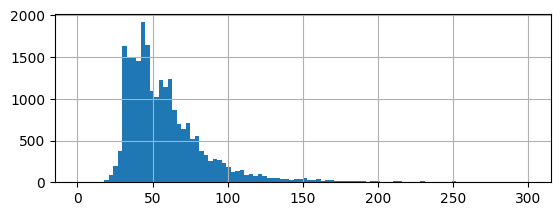

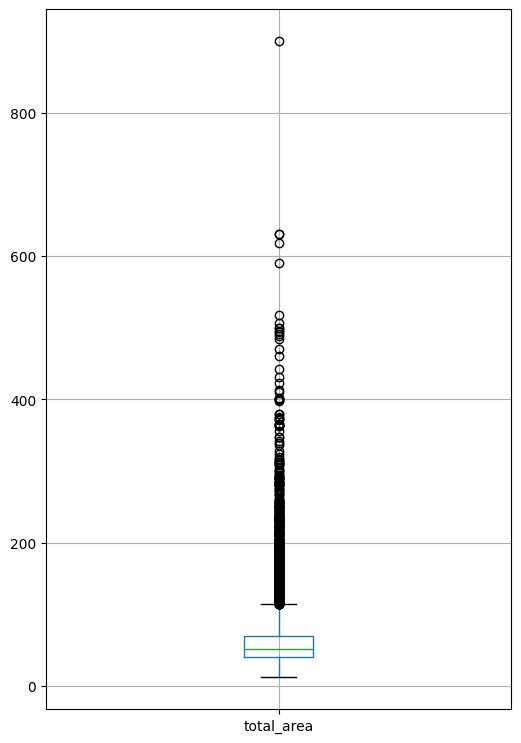

Метод value_counts: 
 total_area
45.0    419
42.0    383
60.0    347
31.0    346
44.0    345
Name: count, dtype: int64 

Квантиль 95%: 116.0 

Метод describe: 
 count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


In [54]:
plt.subplot(2, 1, 1)
df["total_area"].hist(bins=100, range=(0, 300))
plt.figure(figsize=(6, 20))
plt.subplot(2, 1, 2)
df.boxplot(column="total_area")
plt.show()
print("Метод value_counts:", "\n", df["total_area"].value_counts().head(), "\n")
print("Квантиль 95%:", df["total_area"].quantile(.95), "\n")
print("Метод describe:", "\n", df["total_area"].describe())

Видно, что больше всего квартир с площадью от 30 до 50 м^2, а квартир площадью меньше 30 и больше 200 м^2 совсем мало. Много выбросов видно из графика boxplot. Квантиль 95% равен всего 116 м^2. А максимальная площадь квартиры составляет 900 м^2, минимальная 12 м^2, что очень странно.

#### Цена

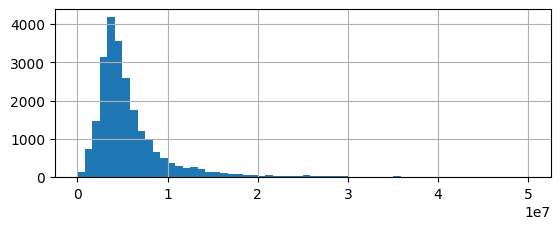

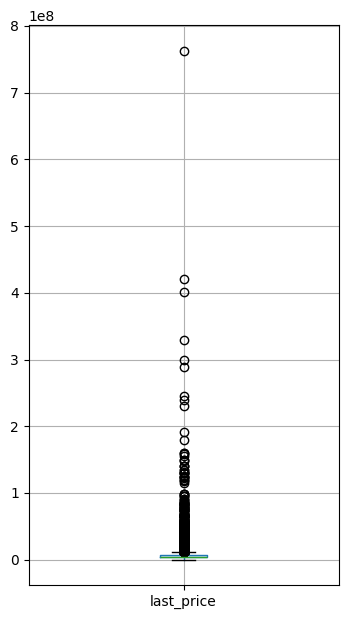

Метод sort_values: 
 8793         12190.0
17456       430000.0
14911       430000.0
16274       440000.0
17676       450000.0
            ...     
15651    300000000.0
1436     330000000.0
14706    401300000.0
19540    420000000.0
12971    763000000.0
Name: last_price, Length: 23699, dtype: float64 

Метод describe: 
 count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64 

Квантиль 95%: 15300000.0


In [55]:
plt.subplot(2, 1, 1)
df["last_price"].hist(bins=60, range=(0,10**7*5))
plt.figure(figsize=(4, 16))
plt.subplot(2, 1, 2)
df.boxplot(column="last_price")
plt.show()
print("Метод sort_values:", "\n", df["last_price"].sort_values(), "\n")
print("Метод describe:", "\n", df["last_price"].describe(), "\n")
print("Квантиль 95%:", df["last_price"].quantile(.95))

Больше всего квартир стоимостью от 3 до 5 млн. рублей. Так же можно заметить, что есть и пару квартир стоимостью 30+ млн. руб., и квартира, которая скорее всего сюда попала по ошибке, т.к. её стоимость составляет всего лишь 12190 руб (возможно её сдают, а не продают). Такой график boxplot показывает, что выбросов так же относительно много.

#### Число комнат

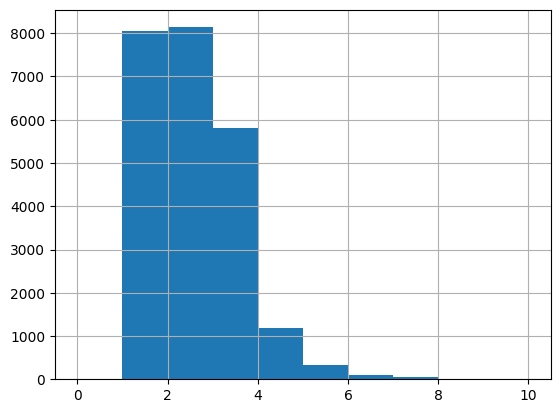

rooms
2     8137
1     8047
3     5814
4     1180
5      326
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: count, dtype: int64

In [56]:
df["rooms"].hist(bins=10, range=(0, 10))
plt.show()
df["rooms"].value_counts()

Видно, что больше всего квартир с комнатами от 1 до 3-4, так же есть парочку квартир, где комнат 15+, и что очень странно, есть 197 квартир с 0 комнат, скорее всего это какая-то ошибка.

#### Высота потолков

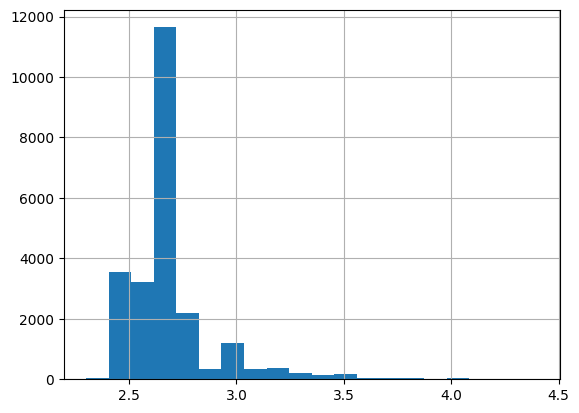

Метод sort_values: 
 22590      1.00
5712       1.20
16934      1.75
20520      2.00
552        2.00
          ...  
20478     27.00
21377     27.50
3148      32.00
22336     32.00
22869    100.00
Name: ceiling_height, Length: 23699, dtype: float64 

Метод value_counts: 
 ceiling_height
2.65    9871
2.50    3515
2.60    1646
2.70    1574
3.00    1112
        ... 
5.00       1
2.20       1
4.15       1
3.93       1
3.59       1
Name: count, Length: 183, dtype: int64 



In [57]:
df["ceiling_height"].hist(bins=20, range=(2.3, 4.4))
plt.show()
print("Метод sort_values:", "\n", df["ceiling_height"].sort_values(), "\n")
print("Метод value_counts:", "\n", df["ceiling_height"].value_counts(), "\n")

В основном высота потолков 2,65 м., потому что было много пропущенных значений, которые я заменил на медиану (2,65), также много квартир, где от 2,4 до 3 м., но есть пару квартир, где высота потолков больше 25 м., в одной квартире даже 100 м., ещё есть пару квартир, где высота потолков менее 2 м.

### Время продажи квартиры

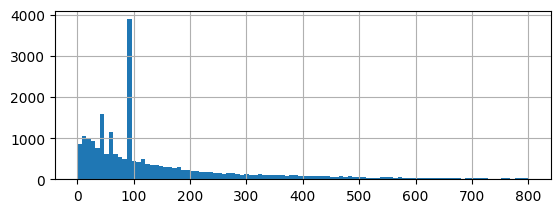

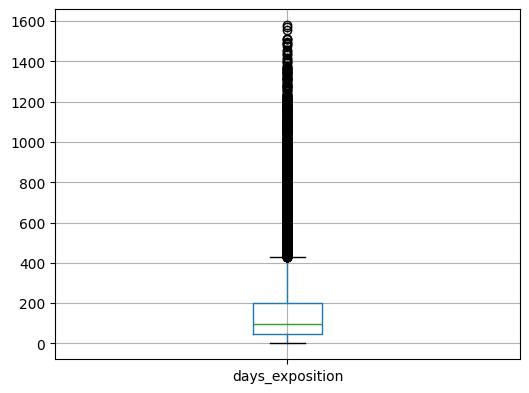

Метод sort_values: 
 1632        1.0
13061       2.0
16212       2.0
16053       2.0
22127       3.0
          ...  
20969    1512.0
1885     1513.0
9553     1553.0
1109     1572.0
18843    1580.0
Name: days_exposition, Length: 23699, dtype: float64 

Метод value_counts: 
 days_exposition
95.0    3245
45.0     880
60.0     538
7.0      234
30.0     208
90.0     204
4.0      176
3.0      158
5.0      152
14.0     148
Name: count, dtype: int64 

Метод describe: 
 count    23699.000000
mean       169.360226
std        206.535633
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64 

Квантиль 90%: 426.0


In [58]:
plt.subplot(2, 1, 1)
df["days_exposition"].hist(bins=100, range=(0, 800))
plt.figure(figsize=(6, 10))
plt.subplot(2, 1, 2)
df.boxplot("days_exposition")
plt.show()
med_sell = df["days_exposition"].median()
sr_sell = df["days_exposition"].mean()
print("Метод sort_values:", "\n", df["days_exposition"].sort_values(), "\n")
print("Метод value_counts:", "\n", df["days_exposition"].value_counts().head(10), "\n")
print("Метод describe:", "\n", df["days_exposition"].describe(), "\n")
print("Квантиль 90%:", df["days_exposition"].quantile(.90))

 Наблюдается очень большой пик в 95 дней, так как я заменил пропущенные значения на медианное, из-за того, что много данных отсутствовало. Среднее значение больше медианного (95) почти в два раза (на 100 дней). Можно предположить, что если продажи прошли за пару дней, то это очень быстро, а если больше ~400 дней, то это очень долго. Также есть два странных пика при 60 и 45 днях. Ещё присутсвуют квартиры, которые продавались несколько лет.

### Про аномальные значения и выбросы

 Помимо квартир с 0 комнатами, аномальных значений я не обнаружил, в некоторых местах есть немного странные выбросы, некоторые пики появились из-за большого объёма отсутсвующих данных в нескольких столбцах (в последствии того, что я заменил их). Выбросы трогать я не стал, так как мне кажется, они обусловлены особенностями исследования, их изменение только нарушит правдивость эксперимента. Исследую квартиры с 0 комнатами:

In [59]:
df.query("rooms==0").sort_values(by="last_price")

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_area,day,month,year,live_total_area,kitchen_total_area


 Я пришёл к выводу, что скорее всего продавцы просто забыли указать количество комнат, а система(или аналитик/инженер данных) обработала пустое количество, как 0, тем более, учитывая, что изначально в столбце rooms не было пустых значений, в отличие от многих других столбцов. Из этого следует, что лучше заменить эти нули на медианное значение по столбцу rooms.

In [60]:
med_rooms = df["rooms"].median()
df["rooms"] = df["rooms"].where(df["rooms"]!=0, med_rooms)
df["rooms"].value_counts()                  

rooms
2     8137
1     8047
3     5814
4     1180
5      326
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: count, dtype: int64

### Зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра, от даты размещения: дня недели, месяца и года

#### От квадратного метра

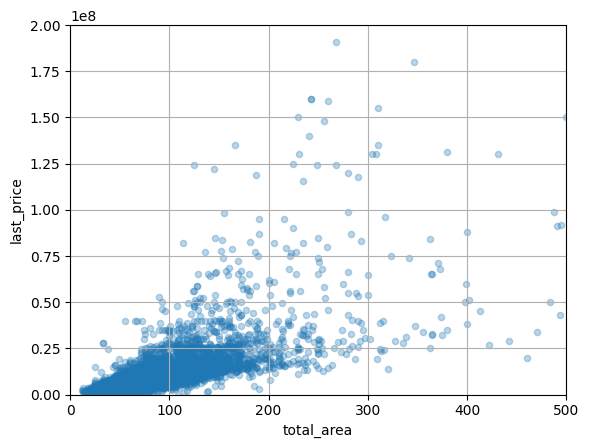

0.6536750579657239

In [61]:
df.plot(x="total_area", y="last_price", kind="scatter", xlim=(0,500), ylim=(0, 2*10**8), grid=True, alpha=0.3)
plt.show()
df["last_price"].corr(df["total_area"])

 Зависимость между площадью и ценой прослеживается (смотря на кооф. корреляции и график), чем больше площадь, тем выше цена, но квартиры площадью больше 200 кв. м. не особо этому подчиняются, данных по ним очень мало ( т. к. такие квартиры достаточно редко встречаются) и они сильно разбросаны. Но зависимость не настолько большая. Стоит отметить, что даже в квартирах площадью от 100 до 200 м^2 встречаются выбросы в цене. Из-за этого кооф. корреляции оказался меньше, чем я предпологал.

#### От числа комнат

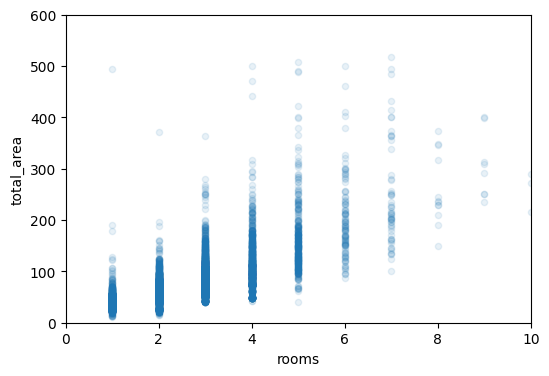

0.36447188663384983

In [62]:
df.plot(x="rooms", y="total_area", kind="scatter", xlim=(0,10), ylim=(0,600), figsize=(6,4), alpha=0.1)
plt.show()
df["last_price"].corr(df["rooms"])

 Здесь есть не очень большая зависимость, чем больше комнат, тем дороже квартиры ( в какой-то степени это так же связанно с площадью). Также квартир с комнатами больше 4 достаточно мало.

#### От этажа (первого или последнего)

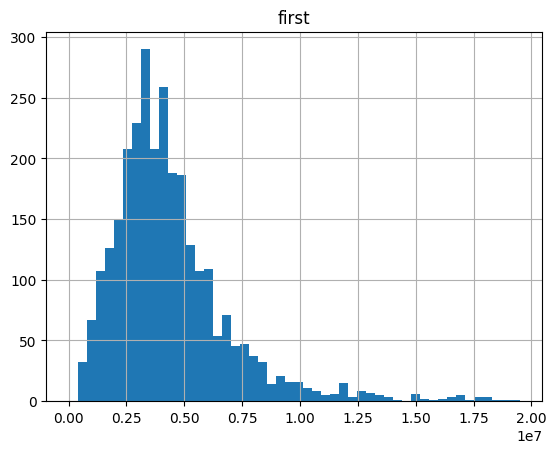

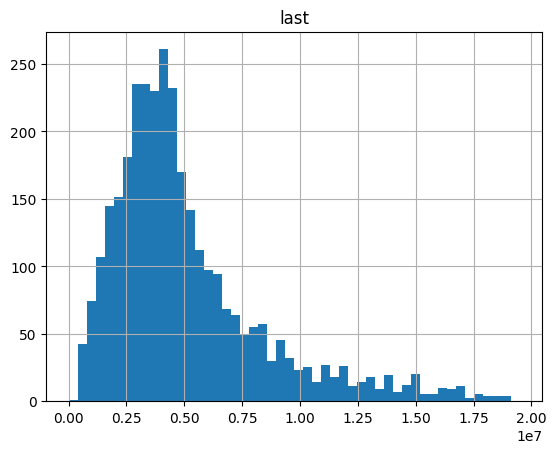

0.080192126645954

In [67]:
floor1 = df.query("floor=='Первый'")
floor1["last_price"].hist(bins=50, range=(0, 11**7))
plt.title("first")
plt.show()
floor_last = df.query("floor=='Последний'")
floor_last["last_price"].hist(bins=50, range=(0, 11**7))
plt.title("last")
plt.show()
floor = df.copy()
floor = floor.query("floor != 'Другой'")
floor["floor"] = floor["floor"].apply(lambda x: 1 if x=="Первый" else 2)
floor["last_price"].corr(floor["floor"])

 Зависимости почти нет. Также графики стоимости квартир на первом и последнем этажах очень похожи.

#### От удалённости от центра

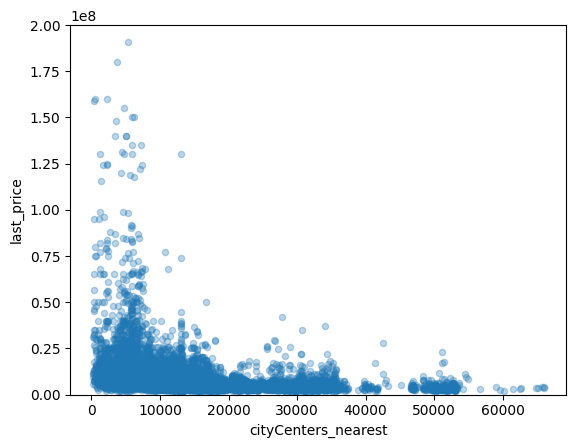

-0.19102883394191525

In [68]:
df.plot(x="cityCenters_nearest", y="last_price", kind="scatter", alpha=0.3, ylim=(0,2*10**8))
plt.show()
df["last_price"].corr(df["cityCenters_nearest"])

 Есть совсем небольшая зависимость, чем ближе к центру, тем дороже квартиры, но это не так сильно проявляется. Также есть относительно много выбросов в цене в квартирах с расстоянием до 10 км.

#### От даты размещения (дня недели, месяца и года)

##### От года

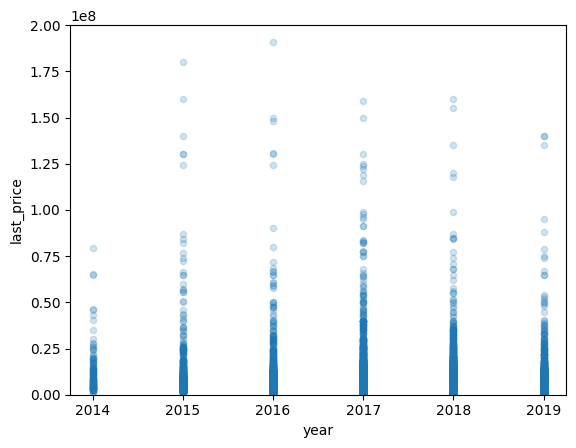

-0.04308903619950854

In [69]:
df.plot(x="year", y="last_price", kind="scatter", ylim=(0, 2*10**8), alpha=0.2)
plt.show()
df["last_price"].corr(df["year"])

 По такому графику мало, что понятно, это одна из проблем, которую я выявил, и пока не могу прийти к её решению. Когда проверяешь взаимосвязь между двумя перемеными, одна из которых количественная, а другая порядковая, то по диаграмме рассеивания сложнее становится разобраться с зависимостями. Благо тут помогает корреляция, и мы видим, что стоимость квартиры не зависит от года публикации объявления о продаже.

##### От месяца

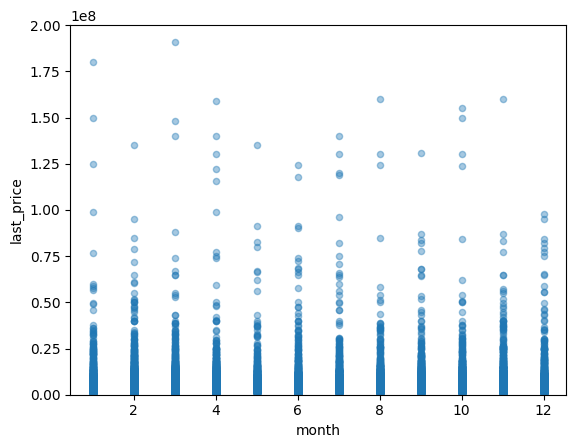

0.0027791287507397166

In [70]:
df.plot(x="month", y="last_price", kind="scatter", ylim=(0, 2*10**8), alpha=0.4)
plt.show()
df["last_price"].corr(df["month"])

 Здесь уже по графику можно предположить, что стоимость квартиры никак не зависит от месяца размещения объявления, и корреляция это подтверждает.

##### От дня

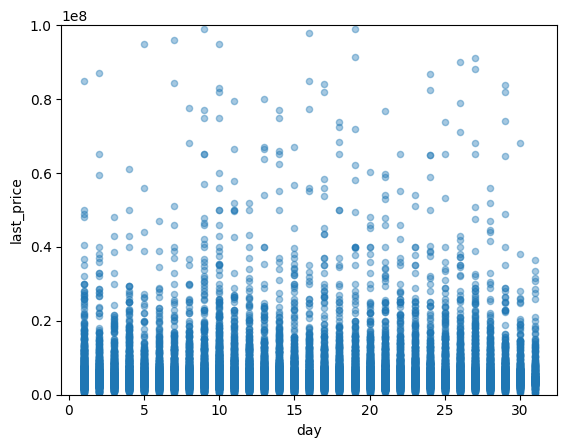

0.009171505298240889

In [71]:
df.plot(x="day", y="last_price", kind="scatter", ylim=(0, 1*10**8), alpha=0.4)
plt.show()
df["last_price"].corr(df["day"])

 Здесь ситуация абсолютно анологичная с прошлой (с месяцем).

#### Небольшой вывод

 Самая большая зависимость цены - это от площади (что неудивительно), также есть зависимость от числа комнат, и ещё меньшая зависимость от удалённости от центра. Зависимостей цены от даты размещения и этажа (первого или последнего) нет.

#### Дополнение

 Почти везде наблюдались сильные выбросы в цене, но их немного. Возможно где-то они появились из-за ошибки пользователя или аналитика (кто собирал данные), а где-то из-за уникальности или какой-то особенности продаваемой квартиры. В принципе это нормально, никакого большого количества аномальных значений я не обнаружил, хоть и графики boxplot где-то из-за выбросов становились малоинформативными.

### Выбрать 10 населённых пунктов с наибольшим числом объявлений. Посчитать среднюю цену квадратного метра в этих населённых пунктах. Выделить населённые пункты с самой высокой и низкой стоимостью жилья.

In [72]:
name = df.pivot_table(index="locality_name", values="price_area", aggfunc=["count", "mean"])
name.columns = ["count", "mean"]
name = name.sort_values(by="count", ascending=False)
t = name.index[:10]
name = name.query("locality_name in @t")
name

,count,mean
locality_name,,
Санкт-Петербург,15721,114849.008794
посёлок Мурино,522,85752.189195
посёлок Шушары,440,78677.364217
Всеволожск,398,68654.473986
Пушкин,369,103125.819291
Колпино,338,75424.579098
посёлок Парголово,327,90175.913458
Гатчина,307,68746.146763
деревня Кудрово,299,92473.547576


In [73]:
min_ = name["mean"].min()
max_ = name["mean"].max()
print(name.query("mean==@min_").index[0])
print(name.query("mean==@max_").index[0])

Выборг
Санкт-Петербург


 Самая высокая стоимость жилья, очевидно в Санкт-Петербурге, а самая маленькая (из этой "большой" десятки) в Выборге.

### Выделить квартиры в Санкт-Петербурге. Выяснить, какая область входит в центр.

#### Создаю столбец с расстоянием до центра в километрах (окргуляю до целых значений). После этого рассчитываю среднюю цену для каждого километра.

In [74]:
st_p = df.query("locality_name=='Санкт-Петербург'").copy()
st_p["centre_km"] = (st_p["cityCenters_nearest"]/1000).apply('ceil')
st_p.sort_values(by="centre_km")
km_p = st_p.pivot_table(index="centre_km", values="last_price", aggfunc=["count", "median"])
km_p.columns = ["count", "median_price"]
km_p

,count,median_price
centre_km,,
1.0,86,11750000.0
2.0,240,10835000.0
3.0,307,9500000.0
4.0,526,8500000.0
5.0,907,9900000.0
6.0,769,8920262.0
7.0,470,8005000.0
8.0,407,7500000.0
9.0,670,6500000.0


#### График: он должен показывать, как цена зависит от удалённости от центра. Определить границу, где график сильно меняется — это и будет центральная зона.

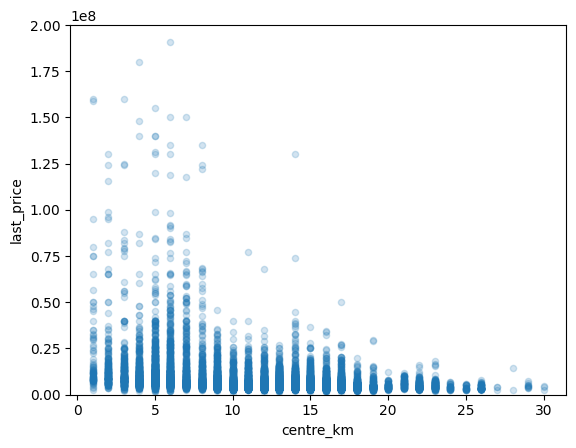

In [75]:
st_p.plot(x="centre_km", y="last_price", kind="scatter", ylim=(0, 2*10**8), alpha=0.2)
plt.show()

 График начинает сильно меняться начиная с 9 км., => до 9 км. - центральная зона.

### Выделить сегмент квартир в центре. Проанализировать эту территорию и изучить следующие параметры: площадь, цена, число комнат. Также выделить факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра). Сделать выводы. Отличаются ли они от общих выводов по всей базе?

In [76]:
stp_center = st_p.query("centre_km<9").copy()
stp_center.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3712 entries, 3 to 23694
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          3712 non-null   int64         
 1   last_price            3712 non-null   float64       
 2   total_area            3712 non-null   float64       
 3   first_day_exposition  3712 non-null   datetime64[ns]
 4   rooms                 3712 non-null   int64         
 5   ceiling_height        3712 non-null   float64       
 6   floors_total          3712 non-null   float64       
 7   living_area           3712 non-null   float64       
 8   floor                 3712 non-null   object        
 9   is_apartment          3712 non-null   bool          
 10  studio                3712 non-null   bool          
 11  open_plan             3712 non-null   bool          
 12  kitchen_area          3712 non-null   float64       
 13  balcony               

#### Площадь

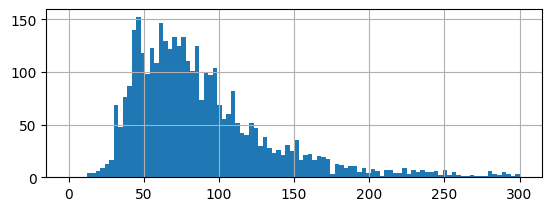

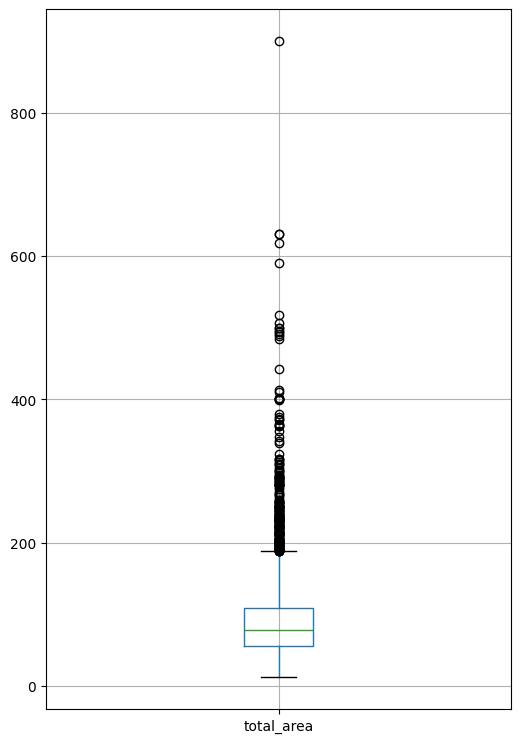

Метод value_counts: 
 total_area
60.0     49
72.0     38
50.0     38
70.0     37
80.0     34
85.0     29
43.0     29
42.0     29
75.0     29
110.0    27
Name: count, dtype: int64
Квантиль 95%: 196.44999999999982
Метод describe: 
 count    3712.000000
mean       92.328303
std        60.531664
min        12.000000
25%        56.000000
50%        77.760000
75%       108.725000
max       900.000000
Name: total_area, dtype: float64


In [77]:
plt.subplot(2, 1, 1)
stp_center["total_area"].hist(bins=100, range=(0, 300))
plt.figure(figsize=(6, 20))
plt.subplot(2, 1, 2)
stp_center.boxplot(column="total_area")
plt.show()
print("Метод value_counts:", "\n", stp_center["total_area"].value_counts().head(10))
print("Квантиль 95%:", stp_center["total_area"].quantile(.95))
print("Метод describe:", "\n", stp_center["total_area"].describe())

 В основном площадь составляет от 40 до 100 м^2. Также видно выбросы. Минимальная площадь 12 м^2, а макс. 900 м^2.

#### Цена

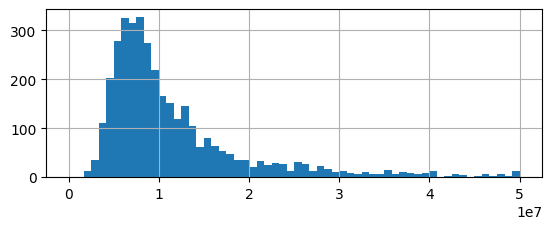

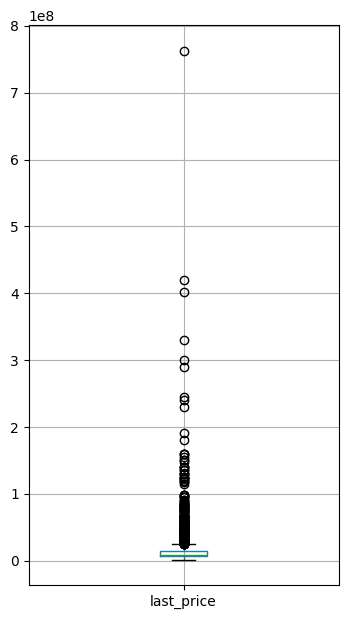

Метод sort_values: 
 23394      1600000.0
19558      1686000.0
17753      1800000.0
19546      1850000.0
10208      1900000.0
            ...     
15651    300000000.0
1436     330000000.0
14706    401300000.0
19540    420000000.0
12971    763000000.0
Name: last_price, Length: 3712, dtype: float64 

describe: 
 count    3.712000e+03
mean     1.472962e+07
std      2.470451e+07
min      1.600000e+06
25%      6.590000e+06
50%      9.000000e+06
75%      1.413138e+07
max      7.630000e+08
Name: last_price, dtype: float64 

Квантиль 95%: 39900000.0


In [78]:
plt.subplot(2, 1, 1)
stp_center["last_price"].hist(bins=60, range=(0,10**7*5))
plt.figure(figsize=(4, 16))
plt.subplot(2, 1, 2)
stp_center.boxplot(column="last_price")
plt.show()
print("Метод sort_values:", "\n", stp_center["last_price"].sort_values(), "\n")
print("describe:", "\n", stp_center["last_price"].describe(), "\n")
print("Квантиль 95%:", stp_center["last_price"].quantile(.95))

 В среднем цена составляет от 6 до 9 млн руб. График boxplot как и в прошлом измерении цены (только во всей выборке) из-за выбросов выглядит не очень информативно.

#### Число комнат

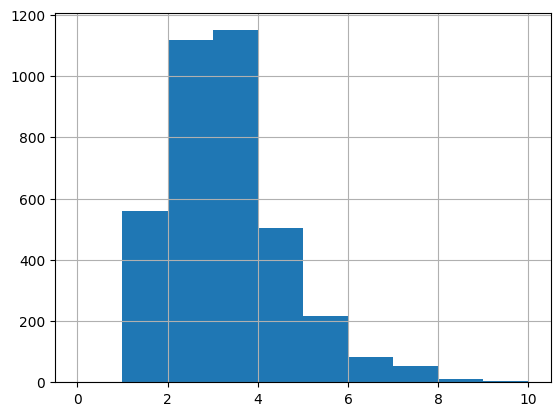

rooms
3     1150
2     1119
1      560
4      503
5      218
6       84
7       54
8       11
9        3
11       2
14       2
10       2
15       1
19       1
16       1
12       1
Name: count, dtype: int64

In [79]:
stp_center["rooms"].hist(bins=10, range=(0, 10))
plt.show()
stp_center["rooms"].value_counts()

 Больше всего квартир с 2 и 3 комнатами, также достаточно с 1 и 4-5.

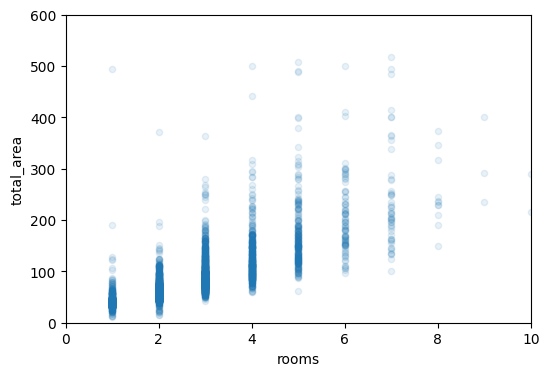

0.33451306078617576

In [80]:
stp_center.plot(x="rooms", y="total_area", kind="scatter", xlim=(0,10), ylim=(0,600), figsize=(6,4), alpha=0.1)
plt.show()
stp_center["last_price"].corr(stp_center["rooms"])

 Присутсвует зависимость, но она не очень сильно выражена, чем больше комнат, тем дороже квартиры. 

#### От этажа (первого или последнего)

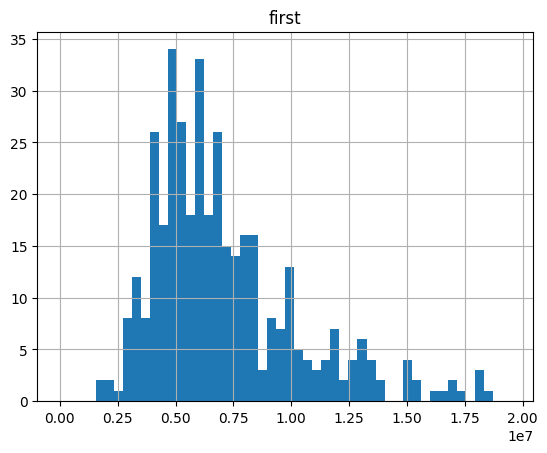

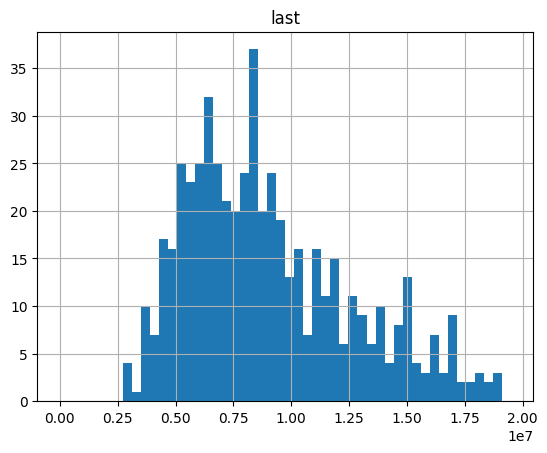

0.13125399173382862

In [82]:
floor1 = stp_center.query("floor=='Первый'")
floor1["last_price"].hist(bins=50, range=(0, 11**7))
plt.title("first")
plt.show()
floor_last = stp_center.query("floor=='Последний'")
floor_last["last_price"].hist(bins=50, range=(0, 11**7))
plt.title("last")
plt.show()
floor = stp_center.copy()
floor = floor.query("floor != 'Другой'")
floor["floor"] = floor["floor"].apply(lambda x: 1 if x=="Первый" else 2)
floor["last_price"].corr(floor["floor"])

 Графики плюс минус схожие. Прослеживается совсем небольшая зависимость, на последнем этаже квартиры стоят дороже, чем на первом.

#### Удалённость от центра

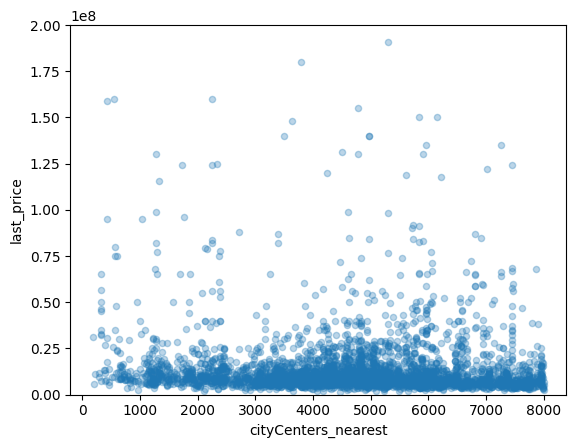

-0.048304000474881544

In [83]:
stp_center.plot(x="cityCenters_nearest", y="last_price", kind="scatter", alpha=0.3, ylim=(0,2*10**8))
plt.show()
stp_center["last_price"].corr(stp_center["cityCenters_nearest"])

 В центральной зоне цена не зависит от удалённости от центра. 

#### Вывод: различия от результатов общей выборки

  Начнём с площади. Площадь квартир в центре в среднем больше, чем площадь квартир по общей базе. Так же цена в центре на порядок больше цен по всей выборке. По количеству комнат примерно одинаково, но в центре больше преобладают квартиры с 2-3 комнатами, а в общей базе - 1-2 (возможно это связанно с заменой пропущенных значений на медианное = 2). Зависимость цены от числа комнат почти одинаковая. Но зависимость ( хоть и очень небольшая) цены от этажа ( первого или последнего) в центре чуть больше. А вот от удалённости от центра в общей выборке зависимость проявляется больше, чем в центре ( там её вообще почти нет).

## Общий вывод

 Я провёл исследование и выполнил предобработку данных. Также все поставленные задания были выполнены. Можно сказать, что данные оказались относительно сырыми, так как имели несколько проблем (которые допустили на "другой стороне") и много пустых значений. Ещё встал вопрос, что делать с выбросами, которые появились из-за самой сущности данных (возможно в каких-то местах из-за ошибок). Возможно, предпологается, что их не нужно учитывать в экспериментах, но я решил, что без них результаты будут неточными (а может быть и наоборот). Скорее всего я ещё несколько раз буду возвращаться к этому проекту и улучшать его. Так как это мой первый проект подобного рода, в нём могло быть допущено много ошибок, но вроде как со своей задачей на данном уровне знаний я справился. Выводы на каждый пункт (или подпункт) можно найти в соответсвующем пункте :)

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: «Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?»
- [x]  выполнено задание: «Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили».
- [x]  выполнено задание: «Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года». 
- [x]  выполнено задание: «Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`».
- [x]  выполнено задание: «Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона».
- [x]  выполнено задание: «Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод